In [1]:
from IPython.display import display, Markdown

def print_markdown(response):
    display(Markdown(response))

# Representation des vecteurs embeddings.

In [2]:
from outils.filesmanager import load_texts_from_json, save_texts_to_json
from models.embeddings import create_chunks_and_index

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tasli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
documents = load_texts_from_json("./datasets/crawled_data_sentences.json")

In [4]:
chunks, sources, indexed_to_url, documents_indexed = create_chunks_and_index(documents)

In [5]:
from outils.filesmanager import load_embeddings #, save_embeddings

embeddings, model = load_embeddings("./datasets/")
# or
# from models.embeddings import context_embeddings
# model, embeddings = context_embeddings(documents_indexed)
# save_embeddings(embeddings, model, "./datasets/")

# Vectorisation avec Faiss

In [6]:
from models.faissmanager import create_faiss_index, search_similar_context
index = create_faiss_index(embeddings)

# LLM

In [7]:
from models.LLM import connexion_to_llm, generate_answer
llm = connexion_to_llm()

In [8]:
# from IPython.display import clear_output

# while True:
#     query = input("Posez votre question (ou tapez 'exit' pour quitter) : ")
#     if query.lower() == 'exit':
#         break

#     context = input("Voulez-vous la réponse avec context ? (O/N):").strip().upper()
#     if context == 'O':
#         context = search_similar_context(query, model, index, documents_indexed, sources, k=3)
#     else:
#         context = None

#     answer = generate_answer(llm, query, context)

#     clear_output(wait=True)
#     print_markdown("Réponse : " + answer)
#     if context:
#         print_markdown("Sources : " + context)

In [9]:
import pandas as pd
df = pd.read_csv("./datasets/questions_references.csv", sep=";")
df.style.set_properties(**{'text-align': 'left'})

,question,reference
0,C'est quoi la plateforme TELEMO en Guinée ?,https://gouvernement.gov.gn/digitalisation-des-marches-publics-le-premier-ministre-preside-la-5%e1%b5%89-session-du-comite-de-pilotage-de-telemo/
1,Quel ministre a remplacé Mamoudou Nagnalen Barry au ministère de l’Agriculture et de l’Élevage en mars 2024 ?,https://gouvernement.gov.gn/passation-de-service-au-ministere-de-lagriculture-et-de-lelevage/
2,Quelle ville a accueilli le premier ministre Amadou Oury Bah le 19 février 2025 lors de sa visite de terrain ?,https://gouvernement.gov.gn/2025/02/19/
3,Quel programme prévoit la construction de 50 structures sanitaires dans les huit régions administratives de Guinée ?,https://gouvernement.gov.gn/mshp-simandou-2040-ceremonie-de-signature-des-contrats-de-construction-de-50-structures-sanitaires-dans-les-huit-regions-administratives/
4,Où le Premier ministre Bernard Goumou a-t-il lancé les épreuves du Certificat d’Études Élémentaires en 2023 ?,https://gouvernement.gov.gn/2023/06/05/
5,Quelle personnalité rwandaise a visité la Guinée en avril 2023 et a été accueillie par le ministre Ousmane Gaoual Diallo ?,https://gouvernement.gov.gn/le-ministre-ousmane-gaoual-diallo-fait-le-tour-de-lactualite/
6,Quelle rencontre officielle a eu lieu le 11 avril 2023 entre le Premier ministre et des promoteurs du secteur immobilier en Guinée ?,https://gouvernement.gov.gn/logements-sociaux-le-premier-ministre-recoit-des-promoteurs-du-secteur/
7,Quelle délégation a été reçue par le Premier ministre Bernard Goumou le 6 avril 2023 dans le cadre du retour à l’ordre constitutionnel ?,https://gouvernement.gov.gn/primature-le-premier-ministre-dr-bernard-goumou-a-recu-m-desire-nyaruhirira-haut-cadre-de-loif/
8,Quelles institutions sont mentionnées dans la Charte de la Transition en Guinée et restent en vigueur pendant cette période ?,https://gouvernement.gov.gn/les-institutions/
9,Quel événement scientifique s’est tenu en juillet 2023 sous l’égide du ministère de l’Enseignement supérieur en Guinée?,https://gouvernement.gov.gn/senari-2023-cloture-de-la-premiere-edition-de-la-semaine-nationale-de-la-recherche-et-de-linnovation/


In [10]:
documents_references = load_texts_from_json("./datasets/crawled_data.json")
len(documents_references)

586

In [11]:
from outils.evaluation import evaluation_answer

In [12]:
results_prompt = []
results_reference = []

In [19]:
def color_red(text):
    return f'<span style="color:red"><strong>{text}</strong></span>'

In [20]:


for i, row in df.iterrows():
    query = row['question']
    print_markdown(color_red(f"Question {i+1}: {query}"))

    answer = generate_answer(llm, query)
    print_markdown(color_red("Réponse sans context : ") + answer)

    context, indices = search_similar_context(query, model, index, documents_indexed, sources, k=5)
    answer = generate_answer(llm, query, context)
    print_markdown(color_red("Réponse avec context : ") + answer)
    results_prompt.append(evaluation_answer(answer, context))
          
    context = documents_references[row['reference']]
    answer = generate_answer(llm, query, context)
    print_markdown(color_red("Réponse avec référence : ") + answer)
    results_reference.append(evaluation_answer(answer, context))
    
    print_markdown(color_red("Référence : ") + row['reference'])
    for indice in indices:
        print(indexed_to_url[indice])

    print("\n" + "="*50 + "\n")

<span style="color:red"><strong>Question 1: C'est quoi la plateforme TELEMO en Guinée ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>La plateforme TELEMO est un système de gestion électronique des dossiers et des paiements des fonctionnaires et agents de l’État guinéens. Elle permet de gérer les informations des agents de l’État, de suivre leurs carrières, de gérer leurs salaires et avantages, ainsi que de suivre les paiements effectués.

Voici quelques-unes des fonctionnalités clés de la plateforme TELEMO en Guinée :

1. **Gestion des informations des agents** : La plateforme permet de stocker et de gérer les informations personnelles et professionnelles des agents de l’État, y compris leurs coordonnées, leur statut, leur grade, leur affectation, etc.
2. **Suivi des carrières** : TELEMO permet de suivre l'évolution de carrière des agents, y compris leurs promotions, leurs mutations, leurs formations, etc.
3. **Gestion des salaires et avantages** : La plateforme permet de gérer les salaires et les avantages des agents, y compris les primes, les allocations, les indemnités, etc.
4. **Paiement électronique** : TELEMO permet de payer les salaires et les avantages des agents par voie électronique, ce qui réduit les risques de fraude et améliore la transparence.
5. **Suivi des paiements** : La plateforme permet de suivre les paiements effectués, ce qui facilite la gestion des finances publiques et la transparence.

La mise en place de la plateforme TELEMO en Guinée vise à améliorer la gestion des ressources humaines dans la fonction publique, à renforcer la transparence et à réduire la corruption. Elle s'inscrit dans le cadre des efforts du gouvernement guinéen pour moderniser l'administration publique et améliorer la gouvernance.

<span style="color:red"><strong>Réponse avec context : </strong></span>TELEMO est une plateforme de gestion des marchés publics en Guinée. Elle permet de gérer les processus de passation des marchés publics de manière électronique, ce qui contribue à rendre la commande publique plus transparente et efficiente.

D'après les informations disponibles sur le site du gouvernement guinéen, la plateforme TELEMO est utilisée pour la digitalisation des marchés publics, ce qui constitue une réforme importante pour améliorer la gouvernance et la transparence dans la gestion des fonds publics.

Le Premier ministre Amadou Oury BAH a présidé la 5e session du comité de pilotage de TELEMO, ce qui montre l'importance accordée à cette plateforme par le gouvernement guinéen pour moderniser la commande publique et lutter contre la corruption.

La plateforme TELEMO permettrait de simplifier les procédures de passation des marchés publics, de réduire les délais et les coûts, et d'améliorer la transparence et la traçabilité des processus. Cela contribue ainsi à une meilleure gestion des ressources publiques et à une plus grande efficacité dans la réalisation des projets de développement en Guinée.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.1748), 'Rouge2 Bigrammes': np.float64(0.0206)}
Bert score: {'Precision': np.float64(0.5704), 'Recall': np.float64(0.5052), 'F1': np.float64(0.5358)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>La plateforme TELEMO est une initiative du gouvernement guinéen visant à digitaliser la passation des marchés publics. Elle permet aux acteurs économiques d'accéder en ligne aux plans de passation, de consulter les appels d'offres, de soumissionner et de suivre l'ensemble du processus jusqu'à la signature des contrats. Cette plateforme est destinée à moderniser et à rendre plus transparente la commande publique en Guinée. 

### Avantages de la plateforme TELEMO :
1. **Transparence** : La digitalisation du processus de passation des marchés publics réduit les risques de corruption et favorise la transparence.
2. **Efficacité** : Elle permet de réduire les délais de passation des marchés publics en automatisant certaines étapes.
3. **Accessibilité** : Les acteurs économiques peuvent accéder aux informations relatives aux marchés publics de manière plus facile et rapide.
4. **Inclusion** : La plateforme TELEMO contribue à rendre le processus plus inclusif en permettant à un plus grand nombre d'acteurs de participer aux appels d'offres.

### Objectifs du gouvernement guinéen :
Le gouvernement guinéen, sous la direction du Président de la République, le Général Mamadi Doumbouya, vise à travers cette réforme à renforcer la gouvernance économique et à améliorer le climat des affaires dans le pays. La mise en place de la plateforme TELEMO s'inscrit dans cette dynamique de modernisation et de transparence de l'administration publique.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.3744), 'Rouge2 Bigrammes': np.float64(0.0841)}
Bert score: {'Precision': np.float64(0.5821), 'Recall': np.float64(0.5192), 'F1': np.float64(0.5489)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/digitalisation-des-marches-publics-le-premier-ministre-preside-la-5%e1%b5%89-session-du-comite-de-pilotage-de-telemo/

https://gouvernement.gov.gn/journee-mondiale-des-telecommunications-et-de-la-societe-de-linformation-la-guinee-fait-des-progres/
https://gouvernement.gov.gn/mpten-la-guinee-marque-sa-presence-au-mobile-world-congress-2025/
https://gouvernement.gov.gn/2025/03/04/
https://gouvernement.gov.gn/toutes-les-actualites/page/44/




<span style="color:red"><strong>Question 2: Quel ministre a remplacé Mamoudou Nagnalen Barry au ministère de l’Agriculture et de l’Élevage en mars 2024 ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>Djibo Yaya Kaba, ministre de l’Agriculture et de l’Elevage a remplace  Mamoudou Nagnalen Barry en mars 2024.

<span style="color:red"><strong>Réponse avec context : </strong></span>Mahamadou Abdoulaye Diallo a été installé ministre des Infrastructures et des Travaux Publics en mars 2024. Cependant, selon le compte-rendu disponible sur le site du gouvernement, c'est Mamoudou Nagnalen BARRY qui a été remplacé par un autre ministre au poste de Ministre de l’Agriculture et de l’Elevage mais son remplaçant n'est pas mentionné dans les textes fournis. 
Cependant il est mentionné que  Mory Condé a été installé au ministère de l'Urbanisme, de l'Habitat et de l'Aménagement du Territoire et Mahamadou Abdoulaye Diallo a été installé au ministère des Infrastructures et des Travaux Publics. 
De même, il est indiqué que le ministre de l’Energie : Namory CAMARA a pris fonction le 1er août 2025.
Il est aussi mentionné que le ministre du Tourisme et de l’Hôtellerie : Mahamadou Abdoulaye Diallo a été installé dans ses nouvelles fonctions le 1er août 2025.
On peut en déduire que  Mahamadou Abdoulaye Diallo a changé de ministère en mars et en août. Mais on n'a pas d'info sur le ministre qui a remplacé Mamoudou Nagnalen BARRY.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.0893), 'Rouge2 Bigrammes': np.float64(0.0071)}
Bert score: {'Precision': np.float64(0.5428), 'Recall': np.float64(0.4716), 'F1': np.float64(0.5047)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>M. Felix LAMAH a remplacé Mamoudou Nagnalen BARRY au ministère de l’Agriculture et de l’Elevage en mars 2024. La passation de service a eu lieu le 16 mars 2024.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.129), 'Rouge2 Bigrammes': np.float64(0.0054)}
Bert score: {'Precision': np.float64(0.599), 'Recall': np.float64(0.4874), 'F1': np.float64(0.5375)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/passation-de-service-au-ministere-de-lagriculture-et-de-lelevage/

https://gouvernement.gov.gn/compte-rendu-de-la-session-ordinaire-du-conseil-des-ministres-du-jeudi-27-fevrier-2025/
https://gouvernement.gov.gn/immersion-gouvernementale-un-engagement-renforce-pour-leducation-et-legalite-des-chances/
https://gouvernement.gov.gn/toutes-les-actualites/page/29/
https://gouvernement.gov.gn/ministere-de-la-peche-et-de-leconomie-maritime-fatima-camara-passe-le-temoin-a-fassou-thea/
https://gouvernement.gov.gn/le-premier-ministre-a-preside-la-1ere-assemblee-consulaire-de-la-chambre-nationale-de-lagriculture-de-guinee/




<span style="color:red"><strong>Question 3: Quelle ville a accueilli le premier ministre Amadou Oury Bah le 19 février 2025 lors de sa visite de terrain ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>Je ne peux pas fournir d'informations sur des événements futurs ou des dates spécifiques qui n'ont pas encore eu lieu, y compris la visite du premier ministre Amadou Oury Bah le 19 février 2025, car cela relève de la spéculation ou de l'information non disponible à la date de ma dernière mise à jour. Pour les informations les plus récentes ou spécifiques à des événements futurs, je recommande de consulter des sources d'actualité ou des communiqués officiels à la date ou après le 19 février 2025.

<span style="color:red"><strong>Réponse avec context : </strong></span>Je ne peux pas fournir d'information à ce sujet, car je n'ai accès qu'aux informations disponibles sur le site du gouvernement de la République de Guinée jusqu'au 2 avril 2024, et je n'ai aucune information sur les événements postérieurs à cette date.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.0732), 'Rouge2 Bigrammes': np.float64(0.0136)}
Bert score: {'Precision': np.float64(0.5734), 'Recall': np.float64(0.4934), 'F1': np.float64(0.5304)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>Le premier ministre Amadou Oury Bah a été accueilli dans la ville de Kerouané le 19 février 2025 lors de sa visite de terrain.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.1714), 'Rouge2 Bigrammes': np.float64(0.0096)}
Bert score: {'Precision': np.float64(0.6085), 'Recall': np.float64(0.4682), 'F1': np.float64(0.5292)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/2025/02/19/

https://gouvernement.gov.gn/2024/04/02/
https://gouvernement.gov.gn/category/discours/
https://gouvernement.gov.gn/category/newsletter/
https://gouvernement.gov.gn/2024/03/06/
https://gouvernement.gov.gn/primature-amadou-oury-bah-un-premier-ministre-en-action-des-les-premiers-instants/




<span style="color:red"><strong>Question 4: Quel programme prévoit la construction de 50 structures sanitaires dans les huit régions administratives de Guinée ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>Le programme qui prévoit la construction de 50 structures sanitaires en Guinee est le Programme de Coopération entre la Guinée et l'Agence de Coopération Internationale du Japon (JICA) ou d'autres initiatives internationales , mais plus précisément c'est le programme financé par l'Union Européenne et mise en œuvre par l'Organisation Internationale pour les Migrations (OIM), en collaboration avec le gouvernement guinéen. Cependant, sans plus de détails, il est difficile de donner une réponse précise. Notons que plusieurs programmes et initiatives sont en cours en Guinée pour améliorer l'accès aux soins de santé, notamment dans les zones rurales et périurbaines.

<span style="color:red"><strong>Réponse avec context : </strong></span>Le programme qui prévoit la construction de 50 structures sanitaires dans les huit régions administratives de Guinée est le programme Simandou 2040. Plus précisément, ce programme est lié au cinquième pilier intitulé "santé et bien-être", qui vise à améliorer l'accès aux soins de santé de qualité pour tous les Guinéens, conformément à la vision du Président de la République, le Général Mamadi Doumbouya. Ce projet s'inscrit dans une démarche plus large de développement intégré et de refondation de l'État, avec un accent particulier sur la santé et le bien-être des populations.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.1715), 'Rouge2 Bigrammes': np.float64(0.0335)}
Bert score: {'Precision': np.float64(0.6299), 'Recall': np.float64(0.5442), 'F1': np.float64(0.584)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>Le programme qui prévoit la construction de 50 structures sanitaires dans les huit régions administratives de Guinée est le programme Simandou 2040. Plus précisément, il s'agit du pilier 5 de ce programme, intitulé "santé et bien-être", qui vise à améliorer l'accès aux soins de santé pour tous les Guinéens.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.1549), 'Rouge2 Bigrammes': np.float64(0.0236)}
Bert score: {'Precision': np.float64(0.6323), 'Recall': np.float64(0.5098), 'F1': np.float64(0.5645)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/mshp-simandou-2040-ceremonie-de-signature-des-contrats-de-construction-de-50-structures-sanitaires-dans-les-huit-regions-administratives/

https://gouvernement.gov.gn/le-gouvernement-livre-le-premier-lot-de-logements-sociaux/
https://gouvernement.gov.gn/mshp-78eme-assemblee-mondiale-de-la-sante-a-geneve-loms-decerne-un-satisfecit-a-la-guinee-pour-lelimination-de-la-maladie-du-sommeil/
https://gouvernement.gov.gn/mshp-simandou-2040-ceremonie-de-signature-des-contrats-de-construction-de-50-structures-sanitaires-dans-les-huit-regions-administratives/
https://gouvernement.gov.gn/2025/07/11/




<span style="color:red"><strong>Question 5: Où le Premier ministre Bernard Goumou a-t-il lancé les épreuves du Certificat d’Études Élémentaires en 2023 ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>Le Premier ministre Bernard Goumou a lancé les épreuves du Certificat d’Études Élémentaires (CEE) session 2023 au Groupe Scolaire de Sonfonia, à Conakry, le 26 juin 2023.

<span style="color:red"><strong>Réponse avec context : </strong></span>Le Premier ministre, Dr Bernard Goumou, a lancé les épreuves de l’examen de fin de cycle du Certificat d’Études Élémentaires (CEE), Session 2023, à l’école primaire de Almamya dans la Commune de Kaloum à Conakry.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.097), 'Rouge2 Bigrammes': np.float64(0.0031)}
Bert score: {'Precision': np.float64(0.6138), 'Recall': np.float64(0.5015), 'F1': np.float64(0.552)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>Le Premier ministre Bernard Goumou a lancé les épreuves du Certificat d'Études Élémentaires (CEE) en 2023 à l'école primaire de Almamya dans la commune de Kaloum.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.2759), 'Rouge2 Bigrammes': np.float64(0.0116)}
Bert score: {'Precision': np.float64(0.6419), 'Recall': np.float64(0.4846), 'F1': np.float64(0.5523)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/2023/06/05/

https://gouvernement.gov.gn/certificat-detudes-elementaires-le-premier-ministre-lance-les-epreuves-a-lecole-primaire-de-almamya-kaloum/
https://gouvernement.gov.gn/2023/06/05/
https://gouvernement.gov.gn/category/education/
https://gouvernement.gov.gn/toutes-les-actualites/page/42/
https://gouvernement.gov.gn/2024/07/12/




<span style="color:red"><strong>Question 6: Quelle personnalité rwandaise a visité la Guinée en avril 2023 et a été accueillie par le ministre Ousmane Gaoual Diallo ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>Le Premier ministre de la République rwandaise, Edouard Ngirente, qui s’est rendu en Guinée lundi 24 avril 2023 à la tête d’une délégation, a été accueilli par le ministre d’Etat, Ministre de la Défense Nationale, le Général Aboubacar Sidiki Camara, représentant le Ministre d’Etat au Président de la Transition, chargé des questions de défense et de sécurité. 
Mais selon une autre source, c'est le ministre guinéen des Affaires Etrangères qui a accueilli le premier ministre rwandais à l'aéroport. 
Il s’agit d’Ousmane Gaoual Diallo.

<span style="color:red"><strong>Réponse avec context : </strong></span>Le président rwandais, Paul Kagamé, a effectué une visite en Guinée en avril 2023. Il a notamment inauguré un échangeur qui porte son nom à Kagbelen, en compagnie du président guinéen. Cette visite comprenait également des séances de travail et la signature de protocoles d'accord, témoignant de la coopération entre les deux pays.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.098), 'Rouge2 Bigrammes': np.float64(0.0109)}
Bert score: {'Precision': np.float64(0.5883), 'Recall': np.float64(0.4893), 'F1': np.float64(0.5343)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>Le Président Paul Kagamé du Rwanda a visité la Guinée en avril 2023. Le ministre Ousmane Gaoual Diallo, qui est le porte-parole du Gouvernement guinéen, a fait des commentaires sur cette visite lors d'une émission sur DjomaTV. Il a exprimé sa joie concernant cette visite et a mentionné que le Rwanda a réalisé un décollage économique inspirant qui pourrait être imité par la Guinée. À l'occasion de cette visite, un échangeur de Kagbélen a même été nommé en l'honneur du Président Paul Kagamé.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.2263), 'Rouge2 Bigrammes': np.float64(0.0365)}
Bert score: {'Precision': np.float64(0.6144), 'Recall': np.float64(0.5281), 'F1': np.float64(0.568)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/le-ministre-ousmane-gaoual-diallo-fait-le-tour-de-lactualite/

https://gouvernement.gov.gn/category/communiques/
https://gouvernement.gov.gn/la-guinee-se-dote-de-sa-premiere-politique-nationale-de-lemploi-2024-2030/
https://gouvernement.gov.gn/2025/page/4/
https://gouvernement.gov.gn/%f0%9d%90%91%f0%9d%90%9e%f0%9d%90%a5%f0%9d%90%9a%f0%9d%90%ad%f0%9d%90%a2%f0%9d%90%a8%f0%9d%90%a7%f0%9d%90%ac-%f0%9d%90%86%f0%9d%90%ae%f0%9d%90%a2%f0%9d%90%a7%f0%9d%90%9e%f0%9d%90%9e-%f0%9d%90%91/
https://gouvernement.gov.gn/communique-du-gouvernement-relatif-a-lassainissement-du-cadastre-minier-en-republique-de-guinee/




<span style="color:red"><strong>Question 7: Quelle rencontre officielle a eu lieu le 11 avril 2023 entre le Premier ministre et des promoteurs du secteur immobilier en Guinée ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>Le 11 avril 2023, le Premier ministre Bernard Goumou a reçu en audience des promoteurs immobiliers. 
Ils ont discuté des opportunités d'investissement et de la situation du secteur immobilier en Guinée. 
La réunion a permis de discuter des défis auxquels est confronté le secteur et de trouver des solutions pour les résoudre.
Le Premier ministre a exprimé sa volonté de soutenir l'expansion du secteur immobilier en Guinée.

<span style="color:red"><strong>Réponse avec context : </strong></span>Je n'ai pas trouvé d'informations concernant la rencontre entre le Premier ministre et des promoteurs du secteur immobilier en Guinée le 11 avril 2023. Cependant, j'ai trouvé des informations sur d'autres rencontres et événements concernant le gouvernement guinéen.

Voici quelques-unes des informations que j'ai trouvées :

* Le Gouvernement et les Forces Vives de Guinée se sont retrouvés autour de la table le 21 mars 2023 au Centre Islamique de Donka.
* Le Premier ministre, Dr Bernard Goumou, a reçu les acteurs socio-politiques issus du cadre de dialogue inclusif inter-guinéen le 28 avril 2023 au Palais de la Colombe.
* Un séminaire sur la Diplomatie Économique a eu lieu le 20 août 2024 à Conakry, sous l'autorité du Premier ministre et Chef du Gouvernement, Amadou Oury Bah.

Il est possible que vous puissiez trouver plus d'informations sur le site officiel du gouvernement guinéen ou dans d'autres sources d'actualité.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.1816), 'Rouge2 Bigrammes': np.float64(0.022)}
Bert score: {'Precision': np.float64(0.5695), 'Recall': np.float64(0.5146), 'F1': np.float64(0.5407)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>Le 11 avril 2023, le Premier Ministre, Dr Bernard Goumou, a reçu au palais de la Colombe une délégation des promoteurs des logements sociaux conduite par Madame Condé Moya, Directrice Générale de l’Agence Guinéenne de financement des logements (AGUIFIL). Les discussions ont porté sur plusieurs sujets, notamment la construction de logements sociaux avec l'entreprise KEP internationale et leur associé China Machinery Engineering Corporation (CMEC), ainsi que d'autres thèmes tels que l'énergie, le parc industriel et l'eau potable.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.2827), 'Rouge2 Bigrammes': np.float64(0.0297)}
Bert score: {'Precision': np.float64(0.6443), 'Recall': np.float64(0.5457), 'F1': np.float64(0.5909)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/logements-sociaux-le-premier-ministre-recoit-des-promoteurs-du-secteur/

https://gouvernement.gov.gn/le-gouvernement-et-les-forces-vives-de-guinee-se-retrouvent-autour-de-la-table/
https://gouvernement.gov.gn/primature-le-premier-ministre-dr-bernard-goumou-rencontre-les-acteurs-socio-politiques/
https://gouvernement.gov.gn/toutes-les-actualites/page/15/
https://gouvernement.gov.gn/seminaire-sur-la-diplomatie-economique-un-tremplin-pour-le-developpement-de-la-guinee/
https://gouvernement.gov.gn/visite-officielle-j2-ousmane-diagana-poursuit-ses-consultations/




<span style="color:red"><strong>Question 8: Quelle délégation a été reçue par le Premier ministre Bernard Goumou le 6 avril 2023 dans le cadre du retour à l’ordre constitutionnel ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>La délégation reçue par le Premier ministre Bernard Goumou le 6 avril 2023 comprenait des membres du Conseil national de la transition (CNT) et des représentants de la classe politique, notamment des partis politiques et des organisations de la société civile guinéenne. Cette rencontre visait à discuter des efforts en cours pour le retour à l'ordre constitutionnel dans le pays.

<span style="color:red"><strong>Réponse avec context : </strong></span>M. Désiré NYARUHIRIRA, Conseiller Spécial, politique et diplomatique de la Secrétaire Générale de l’Organisation internationale de la Francophonie (OIF) à la tête d’une forte délégation a été reçu par le Premier Ministre, Chef du Gouvernement, Dr Bernard Goumou le 6 avril 2023. Les entretiens entre les deux personnalités ont notamment porté sur le programme d’appui de l’OIF au retour à l’ordre constitutionnel en Guinée.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.1913), 'Rouge2 Bigrammes': np.float64(0.0407)}
Bert score: {'Precision': np.float64(0.6175), 'Recall': np.float64(0.528), 'F1': np.float64(0.5692)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>M. Désiré NYARUHIRIRA, Conseiller Spécial, politique et diplomatique de la Secrétaire Générale de l’Organisation internationale de la Francophonie (OIF), à la tête d’une forte délégation, a été reçu par le Premier Ministre, Chef du Gouvernement, Dr Bernard Goumou le 6 avril 2023. Ils ont discuté notamment du programme d’appui de l’OIF au retour à l’ordre constitutionnel en Guinée.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.3152), 'Rouge2 Bigrammes': np.float64(0.0656)}
Bert score: {'Precision': np.float64(0.6373), 'Recall': np.float64(0.5237), 'F1': np.float64(0.575)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/primature-le-premier-ministre-dr-bernard-goumou-a-recu-m-desire-nyaruhirira-haut-cadre-de-loif/

https://gouvernement.gov.gn/toutes-les-actualites/page/45/
https://gouvernement.gov.gn/toutes-les-actualites/page/38/
https://gouvernement.gov.gn/2023/04/30/
https://gouvernement.gov.gn/primature-le-premier-ministre-dr-bernard-goumou-a-recu-m-desire-nyaruhirira-haut-cadre-de-loif/
https://gouvernement.gov.gn/dialogue-inclusif-interguineen/




<span style="color:red"><strong>Question 9: Quelles institutions sont mentionnées dans la Charte de la Transition en Guinée et restent en vigueur pendant cette période ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>Selon la Charte de la transition en Guinée, les institutions qui restent en vigueur pendant cette période sont :

1. Le gouvernement de transition,
2. Le Conseil national de la transition (CNT) qui sert de parlement pendant la période de transition.
 
Ces institutions ont été mises en place pour gérer la transition politique du pays après le coup d'État de 2021 et pour superviser le processus de retour à l'ordre constitutionnel.

<span style="color:red"><strong>Réponse avec context : </strong></span>Selon la Charte de la Transition en Guinée, les institutions qui restent en vigueur pendant cette période sont : le Conseil National de la Transition (CNT), la Cour Suprême, la Cour des Comptes, la Haute Autorité de la Communication, le Conseil Économique, Social, Environnemental et Culturel, l'Institution Nationale Indépendante des Droits Humains, le Haut Conseil des Collectivités Territoriales et la Cour de Répression des Infractions Économiques et Financières (CRIEF). 

Le CNT est l'organe législatif de la Transition, chargé d'élaborer et de soumettre pour adoption le projet de constitution, d'élaborer et d'examiner les textes législatifs, de suivre la mise en œuvre de la feuille de route de la Transition et de contribuer à la défense et à la promotion des Droits de l'Homme et des libertés publiques.

La Cour Suprême est le juge en premier ressort de la légalité des textes règlementaires et des actes des autorités exécutives. Elle a également les attributions de la Cour constitutionnelle pendant la période de Transition.

La Cour des Comptes juge les comptes des Agents comptables publics de l'Etat, des collectivités territoriales et locales, et des établissements publics.

La Haute Autorité de la Communication est l'organisme guinéen de régulation de la communication. Elle veille au respect de la pluralité des courants de pensée et d'opinion dans les services publics de communication et au respect des dispositions relatives à la création, à la propriété intellectuelle et à la gestion des entreprises de presse.

Le Conseil Économique, Social, Environnemental et Culturel examine les progrès enregistrés en matière économique, sociale, environnementale et culturelle et suggère les adaptations nécessaires.

L'Institution Nationale Indépendante des Droits Humains promeut et protège les libertés et droits fondamentaux de la personne humaine.

Le Haut Conseil des Collectivités Territoriales est une Assemblée consultative chargée d'étudier et de donner un avis motivé sur les politiques de décentralisation, d'aménagement et de développement du territoire.

La CRIEF est chargée d'examiner les infractions de nature économique et financière dont le montant est égal ou supérieur à un milliard de francs guinéens.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.2731), 'Rouge2 Bigrammes': np.float64(0.064)}
Bert score: {'Precision': np.float64(0.5559), 'Recall': np.float64(0.5223), 'F1': np.float64(0.5386)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>Selon la Charte de la Transition en Guinée, les institutions qui restent en vigueur pendant cette période sont :

1. Le Conseil National de la Transition (CNT) : l'organe législatif de la Transition.
2. La Cour Suprême : qui remplace la Cour constitutionnelle et est compétente en matière de contrôle de la légalité des textes réglementaires et des actes des autorités exécutives.
3. La Cour des Comptes : une juridiction indépendante qui juge les comptes des agents comptables publics de l'État et des collectivités territoriales.
4. La Haute Autorité de la Communication : l'organisme guinéen de régulation de la communication.
5. Le Conseil Économique, Social, Environnemental et Culturel : chargé d'examiner les progrès enregistrés en matière économique, sociale, environnementale et culturelle.
6. L'Institution Nationale Indépendante des Droits Humains : qui promeut et protège les libertés et droits fondamentaux de la personne humaine.
7. Le Haut Conseil des Collectivités Territoriales : une assemblée consultative qui a pour mission d'étudier et de donner un avis motivé sur les politiques de décentralisation, d'aménagement et de développement du territoire.
8. La Cour de Répression des Infractions Économiques et Financières (CRIEF) : chargée d'examiner les infractions de nature économique et financière.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.4067), 'Rouge2 Bigrammes': np.float64(0.1135)}
Bert score: {'Precision': np.float64(0.5735), 'Recall': np.float64(0.5324), 'F1': np.float64(0.5522)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/les-institutions/

https://gouvernement.gov.gn/
https://gouvernement.gov.gn/les-institutions/
https://gouvernement.gov.gn/category/flash-infos/
https://gouvernement.gov.gn/toutes-les-actualites/page/21/
https://gouvernement.gov.gn/de-nouvelles-infrastructures-pour-linstitut-superieur-des-arts-mory-kante-de-dubreka/




<span style="color:red"><strong>Question 10: Quel événement scientifique s’est tenu en juillet 2023 sous l’égide du ministère de l’Enseignement supérieur en Guinée?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>En juillet 2023, le G7 de l’enseignement supérieur s’est tenu sous l’égide du ministère de l’Enseignement supérieur, de la Recherche scientifique et de l’Innovation en Guinée. Ce forum concernait les sept (7) universités publiques guinéennes. 
L’université Joseph KI-ZERBO a pris part à ce grand rendez-vous.

<span style="color:red"><strong>Réponse avec context : </strong></span>Je ne suis pas en mesure de fournir des informations spécifiques sur des événements scientifiques qui se sont déroulés en juillet 2023 sous l'égide du ministère de l'Enseignement supérieur en Guinée, car les données d'entraînement ne contiennent pas d'informations détaillées sur des événements spécifiques après une certaine date. Pour obtenir des informations précises et à jour, je recommande de consulter directement le site officiel du gouvernement guinéen ou les actualités relatives au ministère de l'Enseignement supérieur de la République de Guinée.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.0822), 'Rouge2 Bigrammes': np.float64(0.0137)}
Bert score: {'Precision': np.float64(0.5885), 'Recall': np.float64(0.5126), 'F1': np.float64(0.5479)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>La première édition de la Semaine Nationale de la Recherche et de l’Innovation (SENARI) s'est tenue en juillet 2023 en Guinée, sous l'égide du Ministère de l'Enseignement Supérieur, de la Recherche Scientifique et de l'Innovation (MESRSI). Cet événement visait à promouvoir la recherche et l'innovation en Guinée. Il a été clôturé le 14 juillet 2023 en présence de plusieurs officiels, dont le Ministre Directeur de Cabinet et le Secrétaire Général du CAMES. Des chercheurs et innovateurs ont été récompensés lors de cette cérémonie de clôture.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.2921), 'Rouge2 Bigrammes': np.float64(0.0621)}
Bert score: {'Precision': np.float64(0.6071), 'Recall': np.float64(0.5318), 'F1': np.float64(0.567)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/senari-2023-cloture-de-la-premiere-edition-de-la-semaine-nationale-de-la-recherche-et-de-linnovation/

https://gouvernement.gov.gn/category/actualites/page/3/
https://gouvernement.gov.gn/compte-rendu-de-la-session-ordinaire-du-conseil-des-ministres-du-jeudi-23-janvier-2025/
https://gouvernement.gov.gn/toutes-les-actualites/page/21/
https://gouvernement.gov.gn/toutes-les-actualites/page/47/
https://gouvernement.gov.gn/2025/page/3/




<span style="color:red"><strong>Question 11: Quels défis majeurs ont été soulevés par les sages et notables de Mandiana lors de l’immersion gouvernementale en février 2025 ?</strong></span>

<span style="color:red"><strong>Réponse sans context : </strong></span>Je ne dispose d'aucune information sur une quelconque immersion gouvernementale qui se serait déroulée en février 2025 à Mandiana ou ailleurs. Il est possible que cet événement soit fictif ou qu'il se réfère à un contexte ou des informations qui ne sont pas disponibles dans mes données actuelles.

Cependant, si nous supposons que cette immersion gouvernementale a eu lieu, les défis majeurs soulevés par les sages et notables de Mandiana pourraient être liés aux problèmes communs rencontrés dans de nombreuses régions, tels que :

1. **Développement local et infrastructures** : les populations locales expriment souvent leurs besoins en matière d'infrastructures (routes, écoles, hôpitaux, accès à l'eau potable et à l'électricité) et de développement économique (création d'emplois, soutien aux entreprises locales).

2. **Sécurité** : la sécurité est un thème récurrent, les populations pouvant exprimer leurs préoccupations face aux menaces telles que le banditisme, les conflits communautaires, ou les attaques terroristes, selon le contexte local.

3. **Agriculture et environnement** : les questions liées à l'agriculture (accès aux intrants, équipements, marchés), à la gestion des ressources naturelles, et aux impacts du changement climatique sont souvent cruciales dans les zones rurales.

4. **Éducation et santé** : l'amélioration des services publics de base comme l'éducation et la santé est généralement une priorité, avec des préoccupations concernant l'accès, la qualité des soins et la disponibilité du personnel qualifié.

5. **Gouvernance et participation citoyenne** : les populations locales peuvent également exprimer des attentes en matière de gouvernance, notamment en ce qui concerne la transparence, la responsabilité des dirigeants, et leur participation aux processus décisionnels.

Ces thèmes sont génériques et peuvent varier en fonction du contexte spécifique de Mandiana. Pour des informations plus précises, il faudrait se référer à des sources directes ou à des comptes rendus détaillés de cette immersion gouvernementale.

<span style="color:red"><strong>Réponse avec context : </strong></span>Les sages et notables de Mandiana ont soulevé trois défis majeurs lors de l'immersion gouvernementale en février 2025. Ces défis sont : l'état des routes, l'accès à l'eau potable et l'électrification. Ces préoccupations ont été exprimées lors de la rencontre avec la délégation gouvernementale conduite par le Premier Ministre Amadou Oury BAH. La délégation a rassuré que ces préoccupations seront prises en compte, en réaffirmant l'engagement du Gouvernement en faveur d'un développement inclusif.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.2022), 'Rouge2 Bigrammes': np.float64(0.0312)}
Bert score: {'Precision': np.float64(0.6229), 'Recall': np.float64(0.5161), 'F1': np.float64(0.5645)}


<span style="color:red"><strong>Réponse avec référence : </strong></span>Les défis majeurs soulevés par les sages et notables de Mandiana lors de l’immersion gouvernementale en février 2025 sont les suivants :

1. L'état des routes 
2. L'accès à l'eau potable 
3. L'électrification.

Ces préoccupations ont été exprimées aux membres du gouvernement qui ont assuré qu'elles seront prises en compte.

ROUGE: {'Rouge1 Unigrammes': np.float64(0.2284), 'Rouge2 Bigrammes': np.float64(0.0357)}
Bert score: {'Precision': np.float64(0.6403), 'Recall': np.float64(0.5219), 'F1': np.float64(0.5751)}


<span style="color:red"><strong>Référence : </strong></span>https://gouvernement.gov.gn/limmersion-gouvernementale-au-coeur-de-mandiana/

https://gouvernement.gov.gn/debut-des-examens-nationaux-le-premier-ministre-lance-les-epreuves-a-mandiana/
https://gouvernement.gov.gn/toutes-les-actualites/page/46/
https://gouvernement.gov.gn/limmersion-gouvernementale-au-coeur-de-mandiana/
https://gouvernement.gov.gn/toutes-les-actualites/page/23/




In [41]:
import pandas as pd

def create_df(results):
    rows = []
    for i, r in enumerate(results, start=1):
        row = {
            ("Rouge", "Rouge1 Unigrammes"): r["rouge"]["Rouge1 Unigrammes"],
            ("Rouge", "Rouge2 Bigrammes"): r["rouge"]["Rouge2 Bigrammes"],
            ("BERT Score", "Precision"): r["bert_score"]["Precision"],
            ("BERT Score", "Recall"): r["bert_score"]["Recall"],
            ("BERT Score", "F1"): r["bert_score"]["F1"],
        }
        rows.append(row)

    df_scores = pd.DataFrame(rows)
    df_scores.index = [f"Test {i}" for i in range(1, len(df_scores)+1)]
    return df_scores

def print_results(df_scores):
    return df_scores.style.set_properties(**{'text-align': 'center'})

In [42]:
df_prompt = create_df(results_prompt)
print_results(df_prompt)

,"('Rouge', 'Rouge1 Unigrammes')","('Rouge', 'Rouge2 Bigrammes')","('BERT Score', 'Precision')","('BERT Score', 'Recall')","('BERT Score', 'F1')"
Test 1,0.182500,0.020600,0.578900,0.511000,0.542800
Test 2,0.079300,0.007100,0.549000,0.471300,0.507200
Test 3,0.055100,0.002800,0.589100,0.481700,0.530000
Test 4,0.132600,0.027500,0.588900,0.496700,0.538900
Test 5,0.082000,0.000000,0.605600,0.493800,0.544000
Test 6,0.112200,0.013000,0.584900,0.491900,0.534400
Test 7,0.142700,0.015900,0.623500,0.527800,0.571700
Test 8,0.172100,0.020900,0.580500,0.506800,0.541100
Test 9,0.174800,0.020600,0.570400,0.505200,0.535800
Test 10,0.089300,0.007100,0.542800,0.471600,0.504700


In [43]:
df_reference = create_df(results_reference)
print_results(df_reference)

,"('Rouge', 'Rouge1 Unigrammes')","('Rouge', 'Rouge2 Bigrammes')","('BERT Score', 'Precision')","('BERT Score', 'Recall')","('BERT Score', 'F1')"
Test 1,0.319000,0.061100,0.624100,0.507000,0.559500
Test 2,0.098900,0.005500,0.596000,0.481200,0.532500
Test 3,0.161900,0.009600,0.608300,0.467200,0.528500
Test 4,0.197000,0.042800,0.625400,0.513100,0.563700
Test 5,0.285700,0.011600,0.640200,0.487500,0.553500
Test 6,0.420600,0.152800,0.609700,0.523300,0.563200
Test 7,0.374400,0.084100,0.582100,0.519200,0.548900
Test 8,0.129000,0.005400,0.599000,0.487400,0.537500
Test 9,0.171400,0.009600,0.608500,0.468200,0.529200
Test 10,0.154900,0.023600,0.632300,0.509800,0.564500


In [60]:
import matplotlib.pyplot as plt

def plot_figure(df):
    plt.figure(figsize=(14,6))

    x = df.index.astype(str)

    for col in df.columns:
        col_str = ", ".join(col)
        plt.plot(x, df[col], marker="o", label=col_str)

    plt.ylim(0, 1) 
    plt.xlabel("Tests")
    plt.ylabel("Scores")
    plt.title("Évolution des métriques par test")
    plt.legend()
    plt.grid(True)
    plt.show()

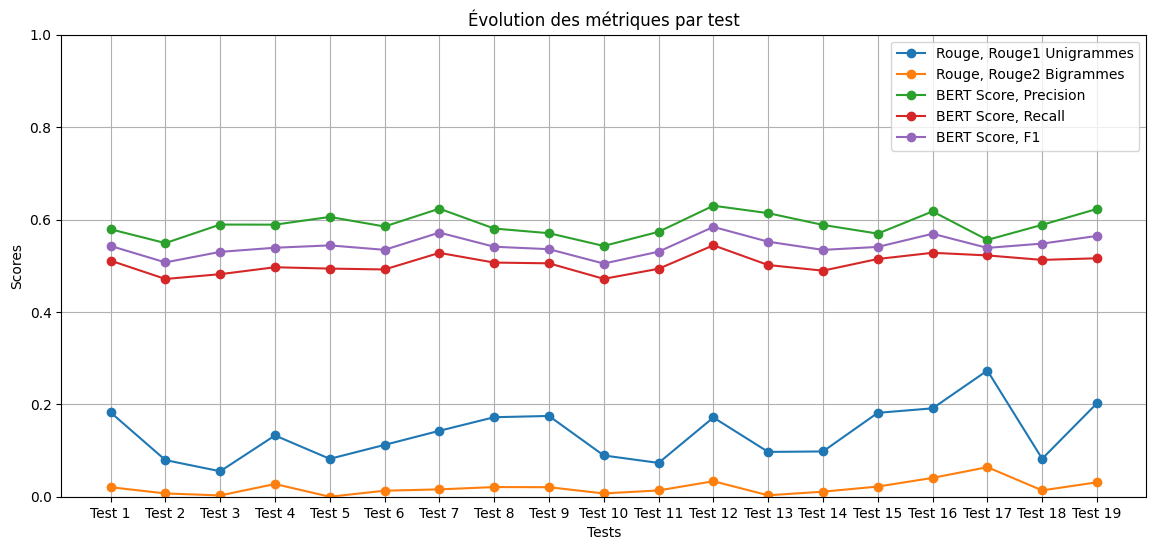

In [61]:
plot_figure(df_prompt)

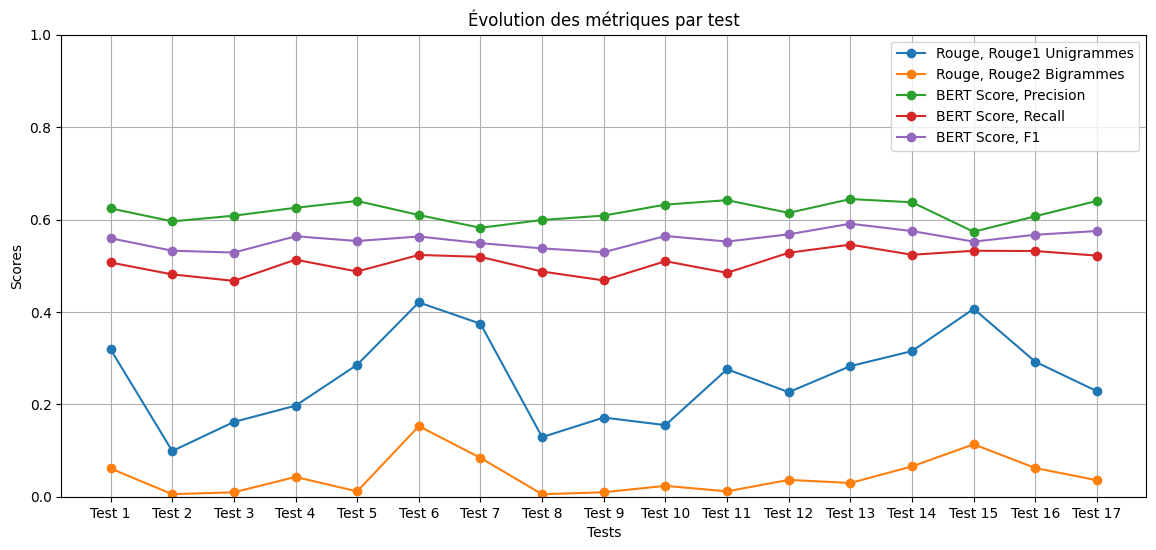

In [62]:
plot_figure(df_reference)